# Credit Card Customer Segmentation

## Introduction

In this project, we’ll play the role of a data scientist working for a credit card company. Our dataset contains information about the company’s clients and we're asked to help **segment them into different groups in order to apply different business strategies** for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

Luckily, the data engineering team has already cleaned most of the data so we can focus on building the best possible model to segment the data. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the **K-means algorithm** to segment the data. The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

### Steps

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

- Analyze the dataset;
- Prepare the data for modeling;
- Find an appropriate number of clusters;
- Segment the data;
- Interpret and explain the results.

### Data Dictionary

Here's the data dictionary:
- customer_id: unique identifier for each customer.
- age: customer age in years.
- gender: customer gender (M or F).
- dependent_count: number of dependents of each customer.
- education_level: level of education ("High School", "Graduate", etc.).
- marital_status: marital status ("Single", "Married", etc.).
- estimated_income: the estimated income for the customer projected by the data science team.
- months_on_book: time as a customer in months.
- total_relationship_count: number of times the customer contacted the company.
- months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
- credit_limit: customer's credit limit.
- total_trans_amount: the overall amount of money spent on the card by the customer.
- total_trans_count: the overall number of times the customer used the card.
- avg_utilization_ratio: daily average utilization ratio.

### Checking Out the Data

Let's import the libraries necessary, as well as our data and have a quick look.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customers = pd.read_csv("C:/DATABASES/customer_segmentation.csv")

In [32]:
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [33]:
customers.shape

(10127, 14)

In [34]:
# checking out null values
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

Our data doesn't have null values. We'll now check out correlations between columns.

In [35]:
customers.corr(numeric_only=True)

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838


Let's visualize the correlations using seaborn.

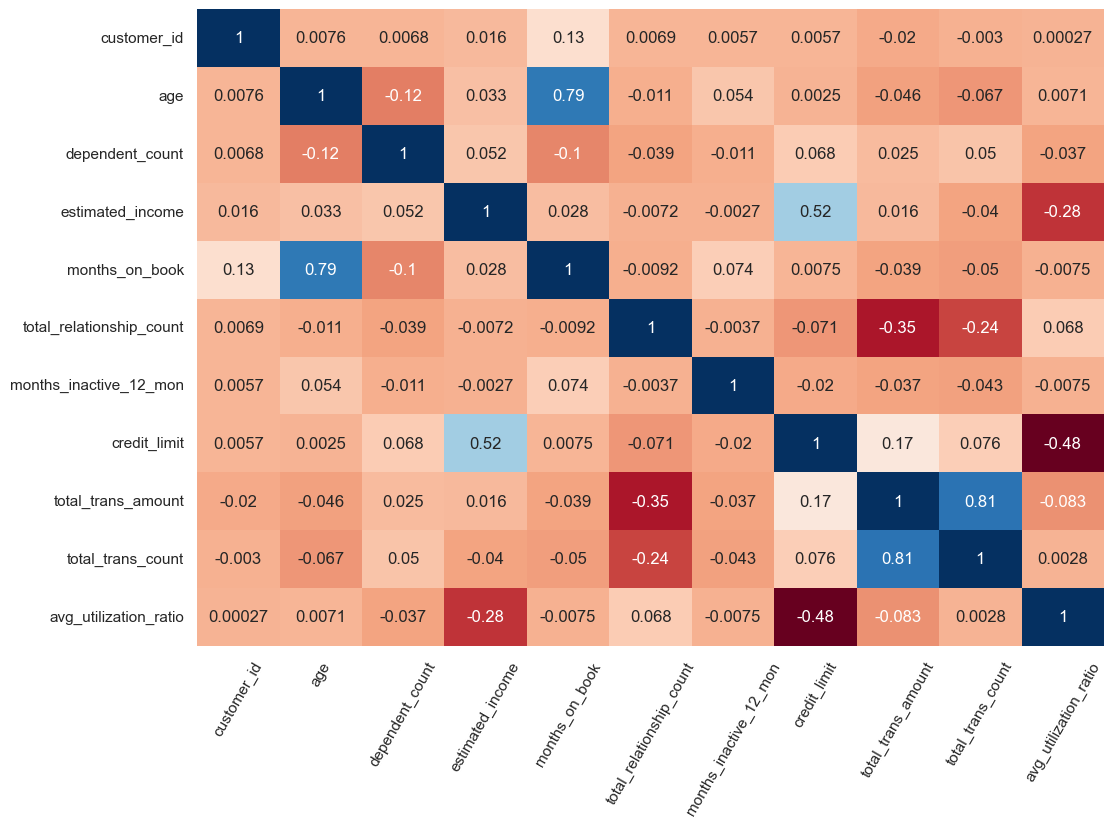

In [36]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(customers.corr(numeric_only=True),cbar=False,
                     cmap='RdBu',annot=True)
plt.xticks(rotation=60)
plt.show()

The columns age and months_on_book are correlated, as one would expect. The columns estimated_income and credit_limit are also highly correlated, as well as total_trans_amount and total_trans_count.

We will now plot some key numeric columns and try to get a better understanding of our dataset.

In [37]:
numericals = ["age",
              "dependent_count",
              "estimated_income",
              "months_on_book",
              "total_relationship_count",
              "months_inactive_12_mon",
             "credit_limit",
             "total_trans_amount",
             "total_trans_count",
             "avg_utilization_ratio"]

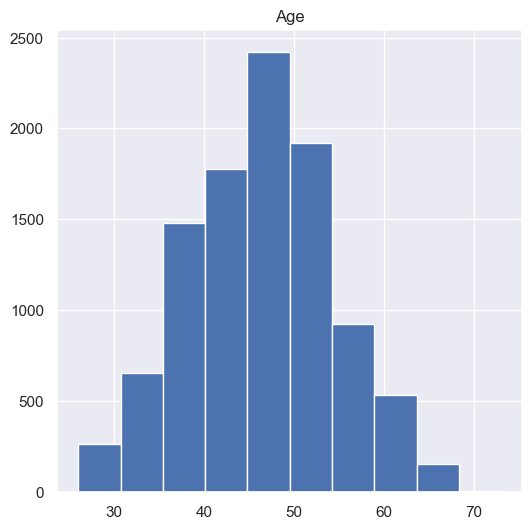

In [38]:
plt.figure(figsize=(6,6))
plt.hist(customers["age"])
plt.title("Age")
plt.show()

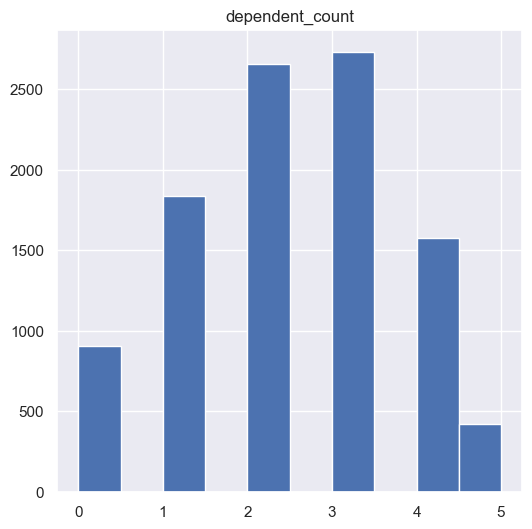

In [39]:
plt.figure(figsize=(6,6))
plt.hist(customers["dependent_count"])
plt.title("dependent_count")
plt.show()

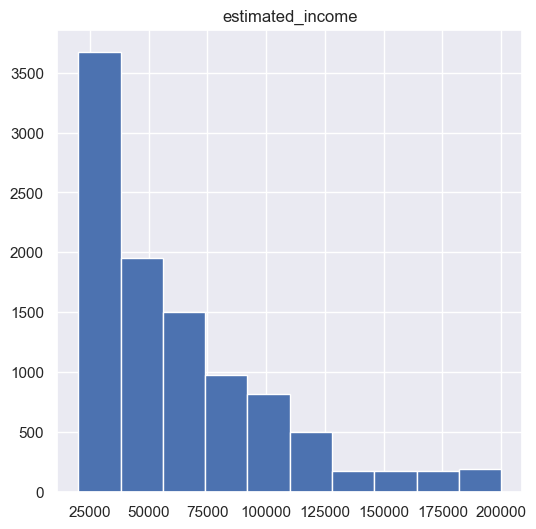

In [40]:
plt.figure(figsize=(6,6))
plt.hist(customers["estimated_income"])
plt.title("estimated_income")
plt.show()

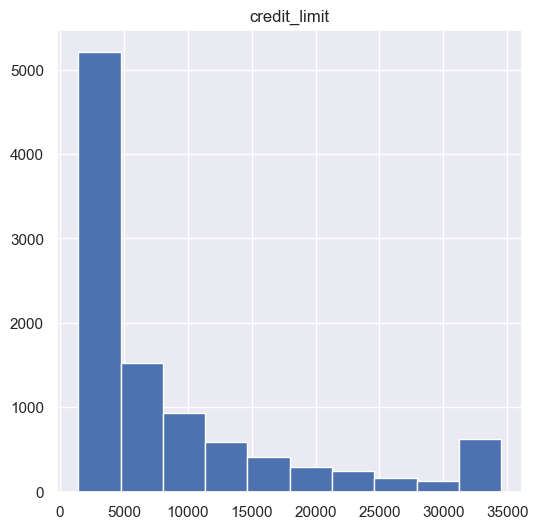

In [41]:
plt.figure(figsize=(6,6))
plt.hist(customers["credit_limit"])
plt.title("credit_limit")
plt.show()

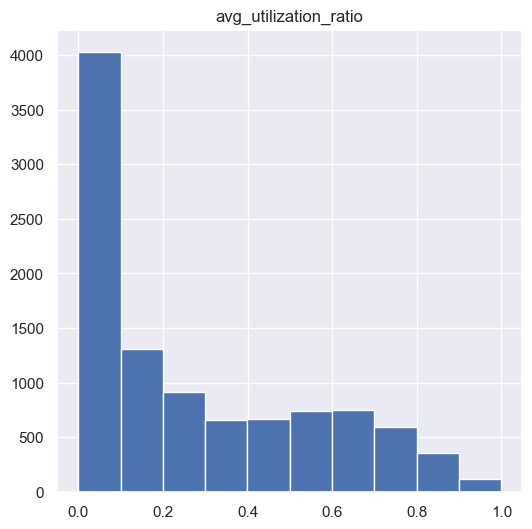

In [42]:
plt.figure(figsize=(6,6))
plt.hist(customers["avg_utilization_ratio"])
plt.title("avg_utilization_ratio")
plt.show()

Several observations:
- age and dependent_count columns have normal distribution.
- estimated_income, credit_limit and avg_utilization_ratio columns are right-skewed. We may see sharp differences between clusters in terms of these columns.

##  Feature Engineering

Before we use K-Means, we must utilize some feature engineering to prepare our data for machine learning. Let's start dealing with the categorical columns. There are three of them: gender, education level, and marital status.

First, let's check on the gender and education_level columns.

The gender column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

The education_level column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.

But before we do the modifications, it's important to create a copy of the original DataFrame. We'll make all the modifications in the copy and leave the original DataFrame untouched so we can use it to analyze the results later.

In [43]:
modif_customers = customers.copy()
modif_customers["gender"] = modif_customers["gender"].replace("M", 1)
modif_customers["gender"] = modif_customers["gender"].replace("F", 0)
modif_customers["gender"].value_counts()

C:\Users\ETERNALPUPPY\AppData\Local\Temp\ipykernel_14640\3799261991.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  modif_customers["gender"] = modif_customers["gender"].replace("F", 0)


gender
0    5358
1    4769
Name: count, dtype: int64

In [44]:
tempdict = {"Uneducated": 0,
"High School": 1,
"College": 2,
"Graduate": 3,
"Post-Graduate": 4,
"Doctorate": 5}
            
modif_customers["education_level"] = modif_customers["education_level"].replace(tempdict)
modif_customers["education_level"].value_counts()

C:\Users\ETERNALPUPPY\AppData\Local\Temp\ipykernel_14640\510561831.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  modif_customers["education_level"] = modif_customers["education_level"].replace(tempdict)


education_level
3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: count, dtype: int64

## Feature Engineering - Part 2

Now, let's deal with the marital_status column. This column contains these unique values:
- Single
- Married
- Divorced
- Unknown

Unfortunately, we can't do the same for this marital_status column as for the last categorical column. As we can see, unlike the education_level column, there is no level of magnitude between "Single", "Married" or "Divorced", for example. We can't say that any of them is higher or better than the others, which means we can't rank these categories objectively.

Therefore, we'll use one-hot-encoding to create dummy variables from this column.

In [45]:
modif_customers = pd.get_dummies(data=modif_customers, columns=["marital_status"], drop_first=True)
modif_customers.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


## Scaling the Data

Note that we have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

At this point of the project we need to transform the data so it's all on the same scale. We'll also drop the customer_id column.

In [46]:
new_df = modif_customers.copy()
new_df = new_df.drop(["customer_id"], axis=1)
new_df.columns

Index(['age', 'gender', 'dependent_count', 'education_level',
       'estimated_income', 'months_on_book', 'total_relationship_count',
       'months_inactive_12_mon', 'credit_limit', 'total_trans_amount',
       'total_trans_count', 'avg_utilization_ratio', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown'],
      dtype='object')

In [47]:
scaler = StandardScaler()
scaler.fit(new_df)

df_scaled = scaler.transform(new_df)
df_scaled = pd.DataFrame(df_scaled)

In [48]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


## The Elbow Curve and Choosing Cluster Number

In order to decide on how many clusters we want to create, we will utilize the elbow curve. The code below goes through numbers from 1 to 10, uses them as cluster numbers and calculates the inertia of the models.

In [49]:
inertias = []
for i in range(1,11):
    model = KMeans(n_clusters=i,n_init=10)
    clusters = model.fit_predict(df_scaled)
    inertia = model.inertia_
    inertias.append(inertia)
for i in inertias:
    print(i)

151905.00000000006
134790.84518292602
123153.64862291525
112889.64791287869
104079.34567530901
98723.62113765228
94452.32999700663
91000.6985363074
88386.04529793552
86073.30937056117


We will now use these inertias to visualize the elbow curve.

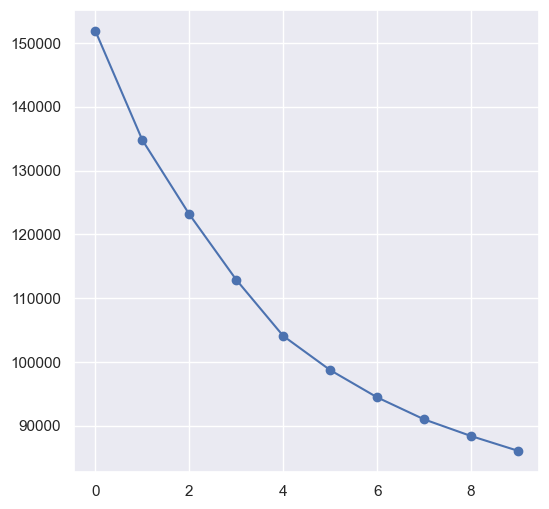

In [50]:
plt.figure(figsize=(6,6))
plt.plot(inertias,marker='o')
plt.show()

Although we don't see a sharp elbow, we can see that the decrease in the inertia slows down after number 6. For this reason, we will choose to segment our data into 6 clusters.

In [51]:
model = KMeans(n_clusters=6,n_init=10,random_state=10)
clusters = model.fit_predict(df_scaled)

## Analyzing Results

All that's left now is to analyze the results. We need to see how the variables used in the clusterization differ from cluster to cluster in order better explain what each cluster represents.

In [52]:
customers["CLUSTER"] = clusters + 1
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,5
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,2
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,5
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,4
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,3


## Plotting the Clusters

### Plotting Numerical Columns

We will now analyze our clusters in terms of the mean of the features with plots. The following plots are grouped by cluster and aggregated with mean() function.

**Addendum:** I will again add static plots:

In [53]:
gb_cust = customers.groupby("CLUSTER")[numericals].mean()

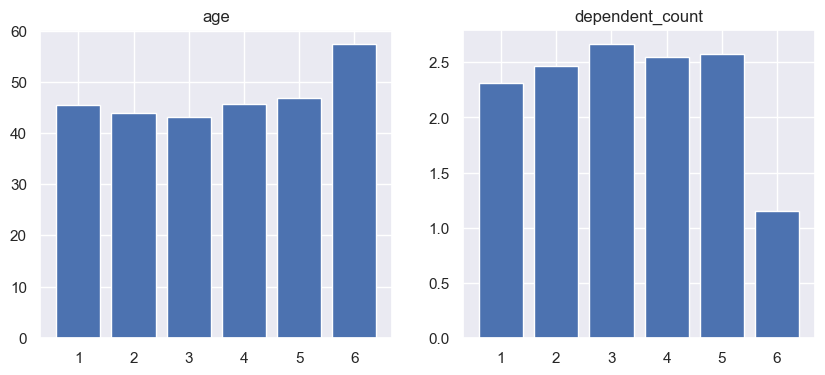

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(x=gb_cust.index, height=gb_cust["age"])
plt.title("age")

plt.subplot(1, 2, 2)
plt.bar(x=gb_cust.index, height=gb_cust["dependent_count"])
plt.title("dependent_count")
plt.show()

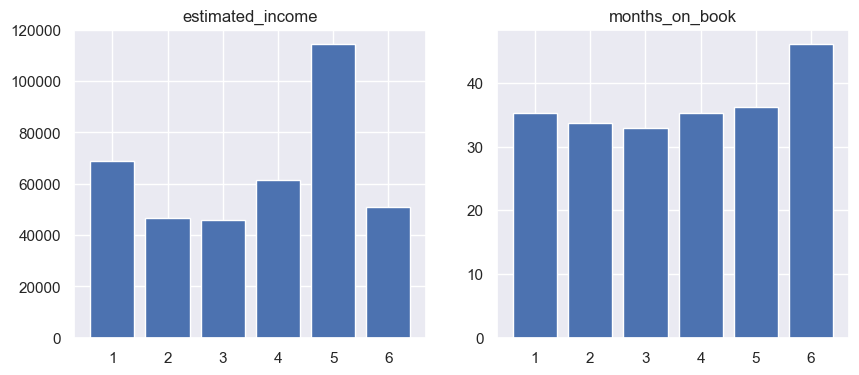

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(x=gb_cust.index, height=gb_cust["estimated_income"])
plt.title("estimated_income")

plt.subplot(1, 2, 2)
plt.bar(x=gb_cust.index, height=gb_cust["months_on_book"])
plt.title("months_on_book")
plt.show()

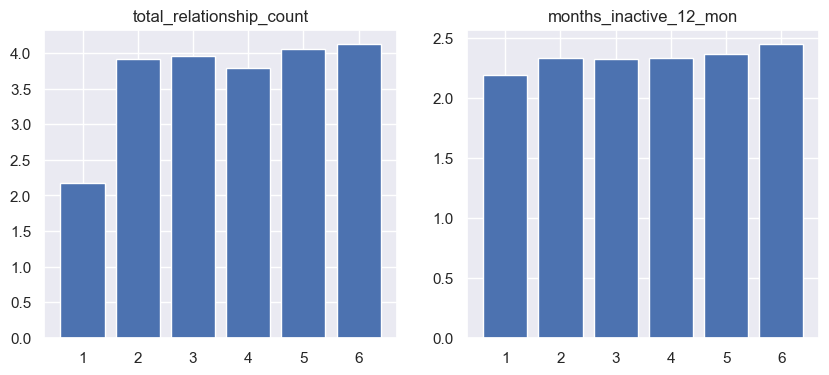

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(x=gb_cust.index, height=gb_cust["total_relationship_count"])
plt.title("total_relationship_count")

plt.subplot(1, 2, 2)
plt.bar(x=gb_cust.index, height=gb_cust["months_inactive_12_mon"])
plt.title("months_inactive_12_mon")
plt.show()

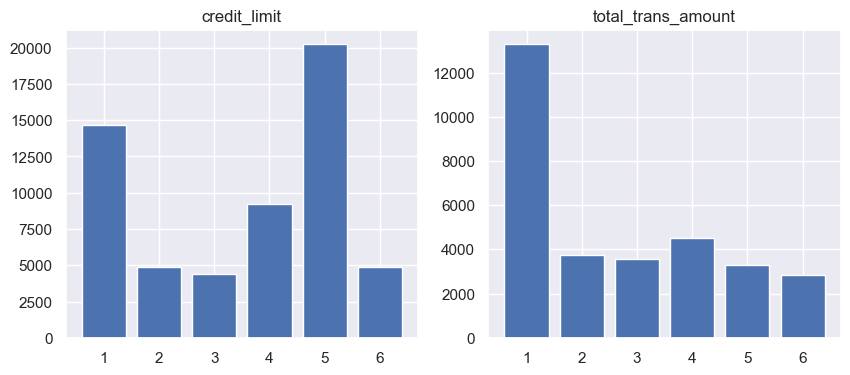

In [57]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(x=gb_cust.index, height=gb_cust["credit_limit"])
plt.title("credit_limit")

plt.subplot(1, 2, 2)
plt.bar(x=gb_cust.index, height=gb_cust["total_trans_amount"])
plt.title("total_trans_amount")
plt.show()

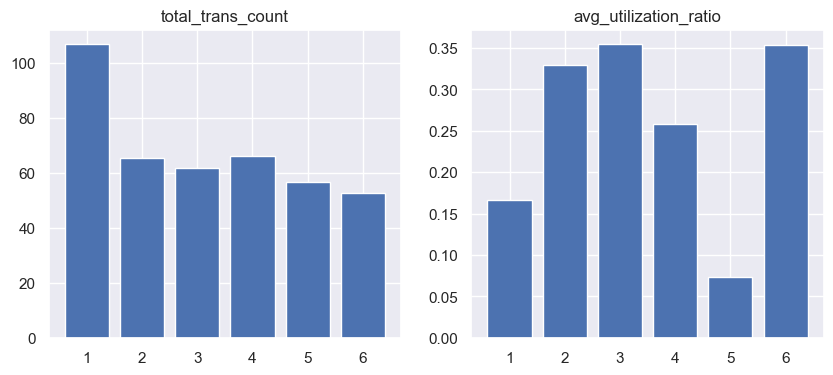

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(x=gb_cust.index, height=gb_cust["total_trans_count"])
plt.title("total_trans_count")

plt.subplot(1, 2, 2)
plt.bar(x=gb_cust.index, height=gb_cust["avg_utilization_ratio"])
plt.title("avg_utilization_ratio")
plt.show()

Some observations:
- Cluster 6 has the highest mean age. The rest of the clusters are similar in terms of mean age, with Cluster 3 being the youngest albeit not by much.
- Cluster 6 also has the least amount of dependents, with 3 having the most.
- Cluster 5 has the highest estimated income, with Clusters 2 and 3 being at the bottom with very similar numbers.
- The mean values for months_on_book are similar, with Cluster 6 on top.
- Cluster 1 has the lowest number in terms of total_relationship_count.
- Cluster 5, which has the highest estimated income also has the highest credit_limit.
- **Despite having only the second largest credit_limit, total_trans_amount of Cluster 1 dwarfs that of Cluster 5.** This information could be valuable for a campaign targeting Cluster 5.
- Cluster 6 has one of the lowest credit_limit mean values. However, they have the highest avg_utilization_ratio. Cluster 5 has the lowest.

### Plotting Categorical Columns

We'll now plot our categorical features.

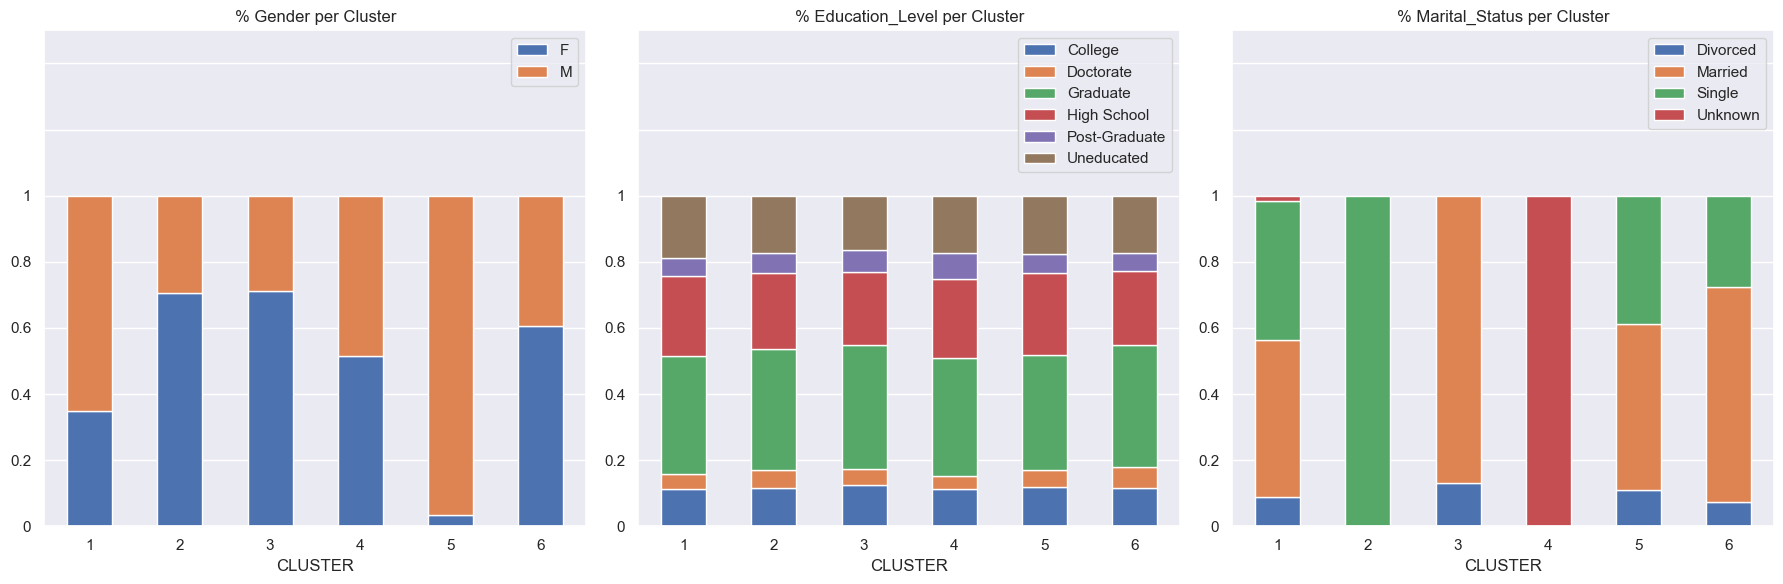

In [71]:
cat_columns = customers.select_dtypes(include=["object"])

import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customers["CLUSTER"], columns=customers[col], values=customers[col], aggfunc="size", normalize="index")
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax)
    ax.set_title(f"% {col.title()} per Cluster")

    ax.set_ylim(0, 1.5)
    ax.legend()
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Some remarks about categorical columns:
- Clusters 2 and 3 consist primarily of women, whereas Cluster 5 is almost entirely male. The rest are more uniform.
- There aren't big differences in terms of education level between clusters. The largest group is always "Graduate".
- Cluster 2 entirely consists of singles. Most customers on Cluster 3 are married.
- Marriage status of customers in Cluster 4 are unknown.

Let's create a scatter plot with different colors for each cluster of pairs of variables with a high correlation, such as credit_limit and avg_utilization_ratio.

<Axes: xlabel='credit_limit', ylabel='avg_utilization_ratio'>

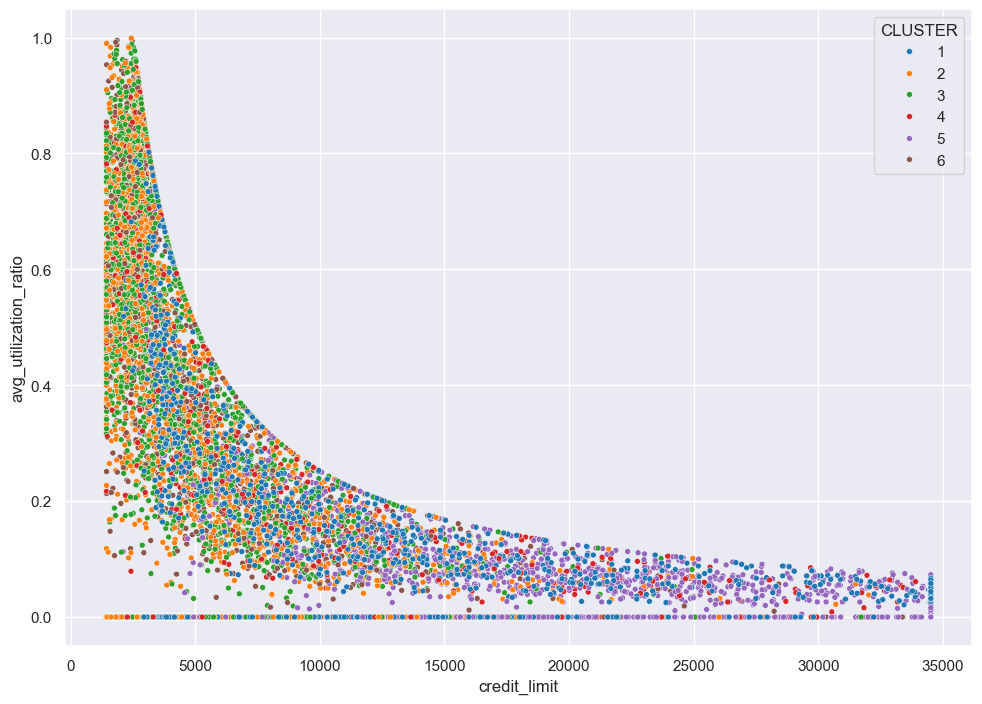

In [60]:
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', palette='tab10', data=customers, s=18)

## Summary of the Clusters

**Cluster 1:**
- 2/3 males
- Lowest total_relationship_count
- Second largest credit_limit, highest total_trans_amount by far
- Similar number of single and married customers

**Cluster 2:**
- 2/3 females
- One of the lowest estimated income
- Mostly singles

**Cluster 3:**
- 2/3 females
- One of the lowest estimated income
- Most amount of dependents
- Mostly married

**Cluster 4:**
- Almost the same number of males and females
- Marriage status is mostly unknown

**Cluster 5:**
- Mostly males
- Highest estimated income
- total_trans_amount unusually low despite the income
- Similar number of single and married customers

**Cluster 6:**
- Around 60% females
- Highest mean age
- Least amount of dependents
- One of the lowest credit_limit, highest avg_utilization_ratio
- More than half are married

## Conclusion - Potential Next Steps

We used K-Means to segment the customers into six clusters and explained the characteristics of each cluster. Stakeholders can use this data for various applications such as targeted marketing and campaigns.

Potential next steps include:
- trying out different numbers of clusters,
- researching other ways to find the best number of clusters and comparing the results with the results from the elbow method,
- using fewer variables in the clusterization.